In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [43]:
df = pd.read_csv("boston_house_prices.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [44]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [45]:
df.shape

(506, 13)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


EXPLORATORY DATA ANALYSIS

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'LSTAT'}>],
       [<Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

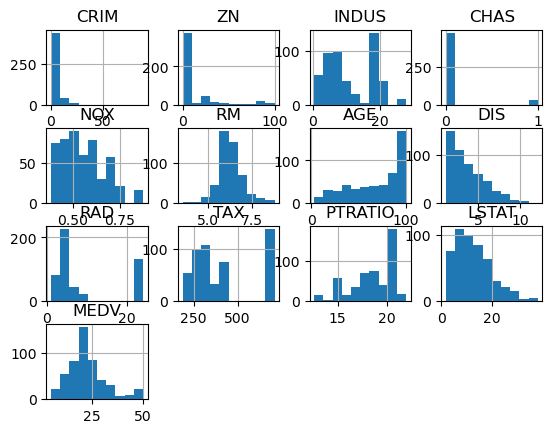

In [49]:
df.hist()

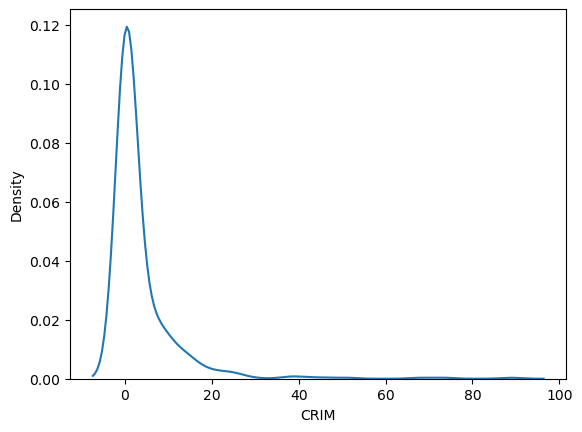

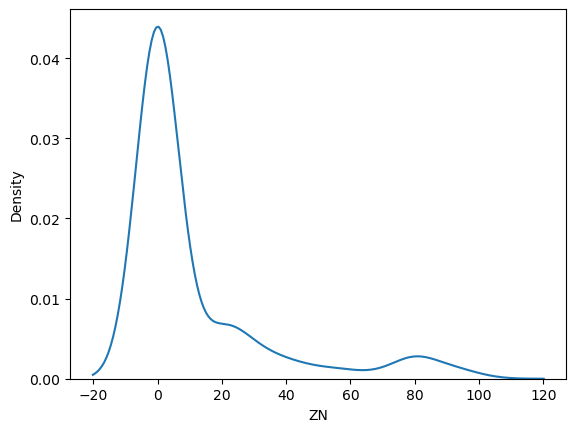

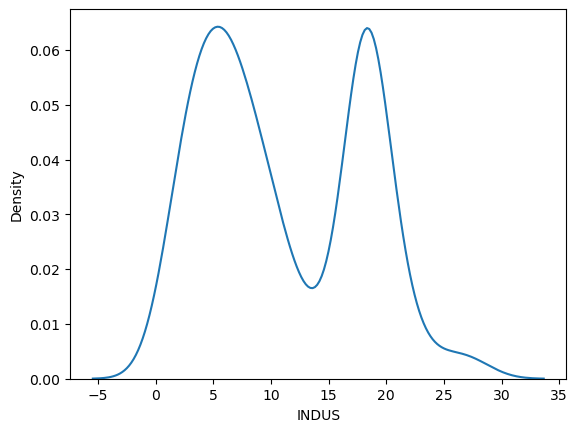

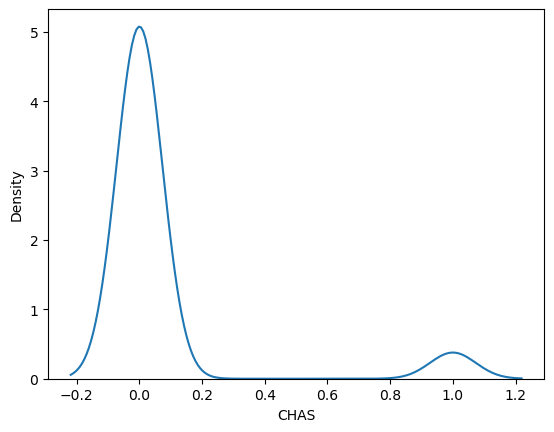

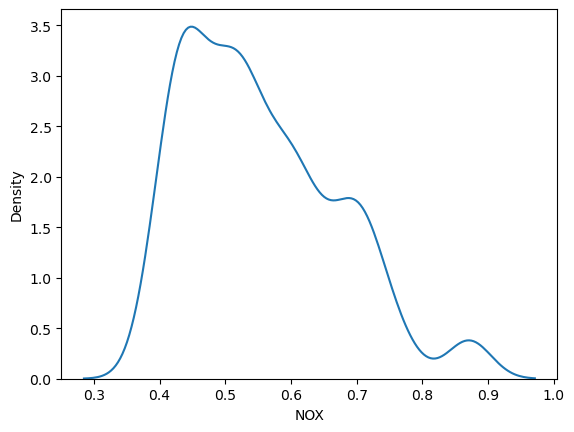

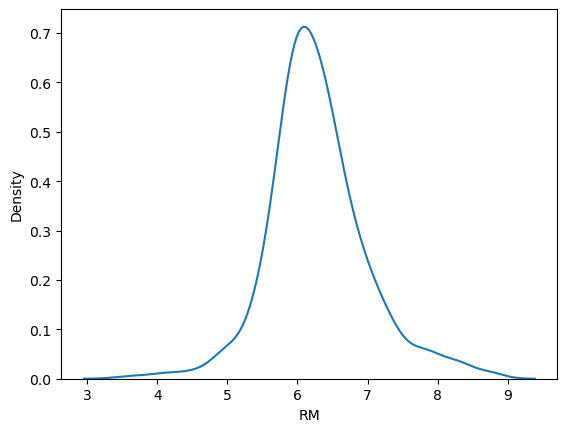

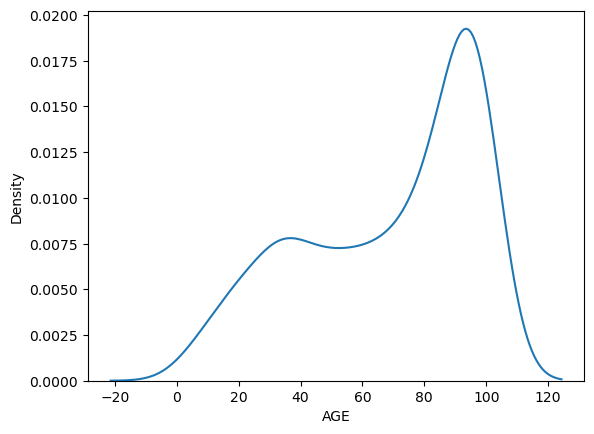

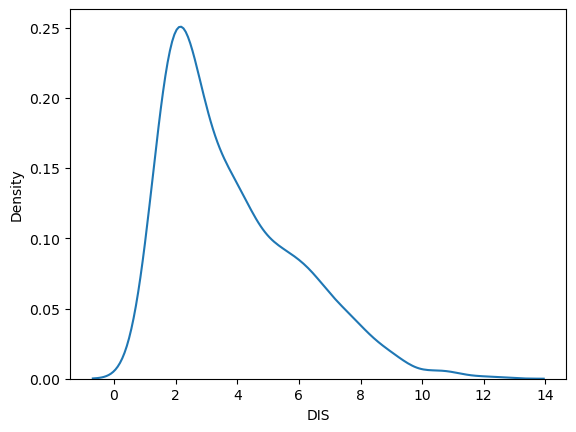

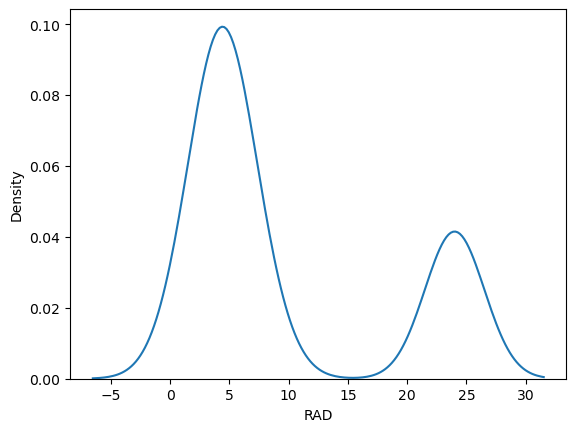

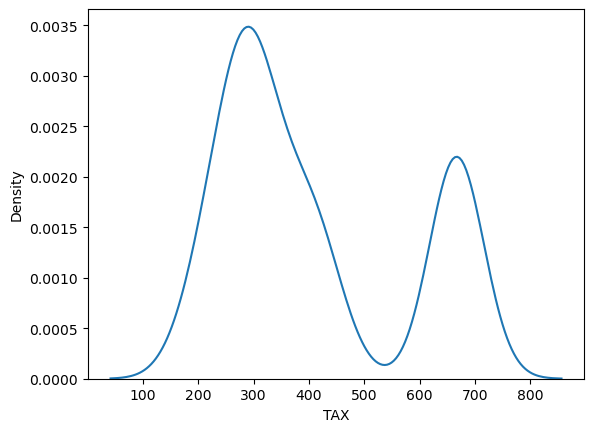

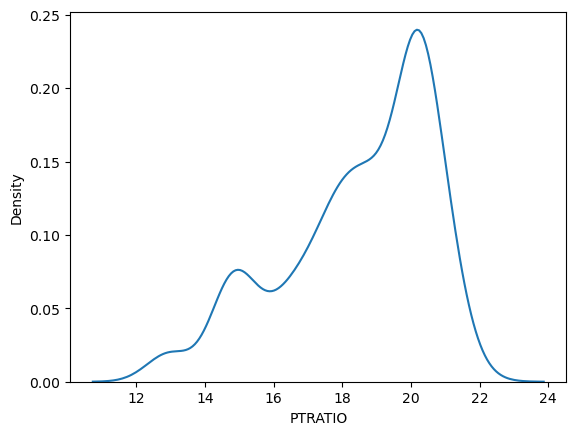

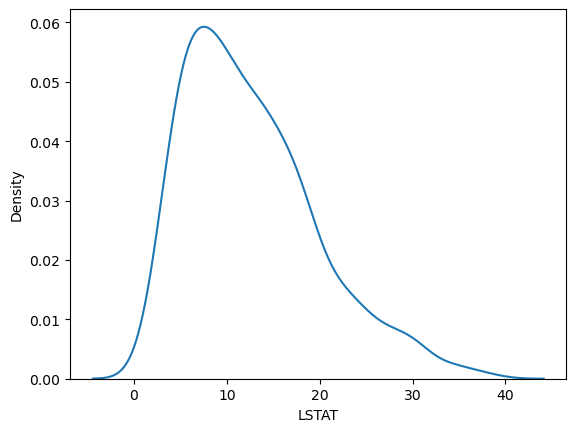

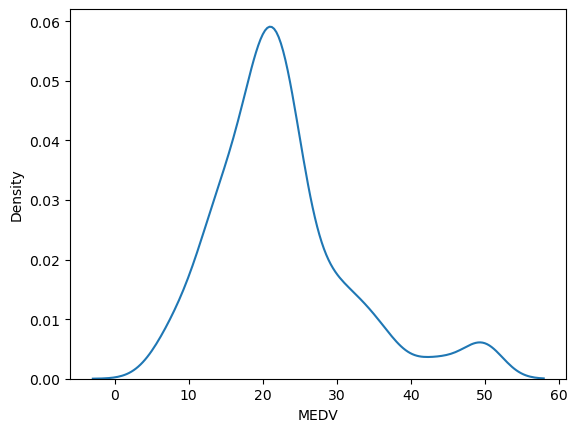

In [52]:
import warnings
warnings.filterwarnings("ignore")
for i in df.columns:
    sns.kdeplot(data=df,x=i)
    plt.show()

OUTLIER TREATMENT

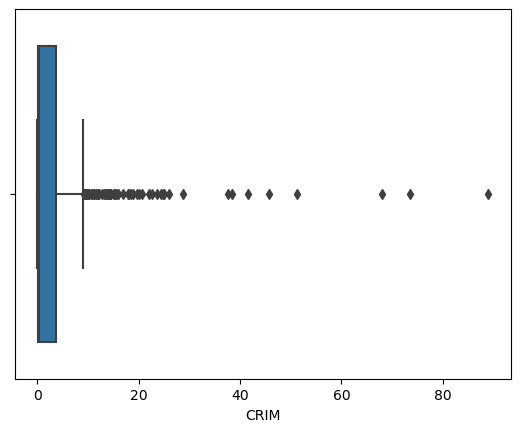

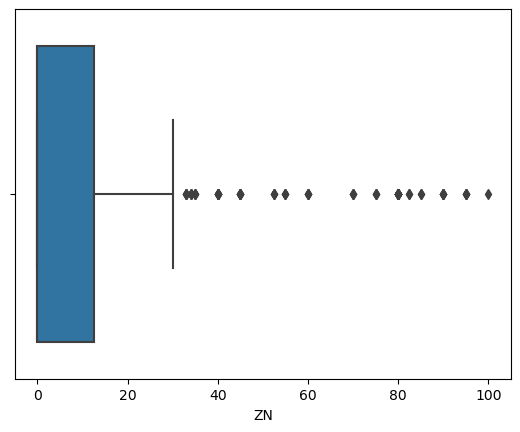

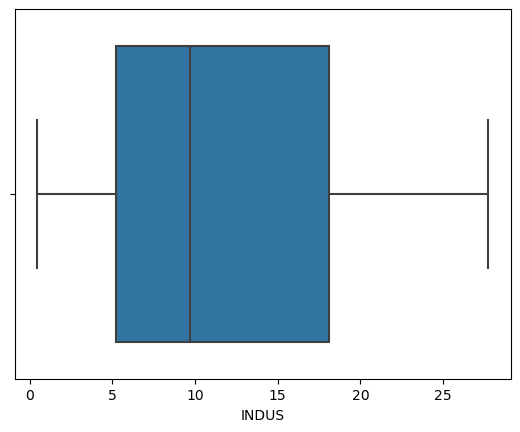

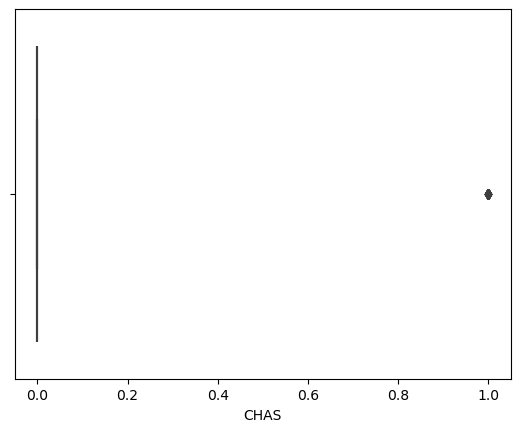

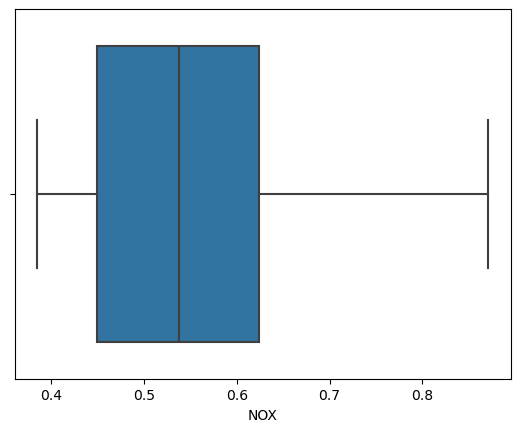

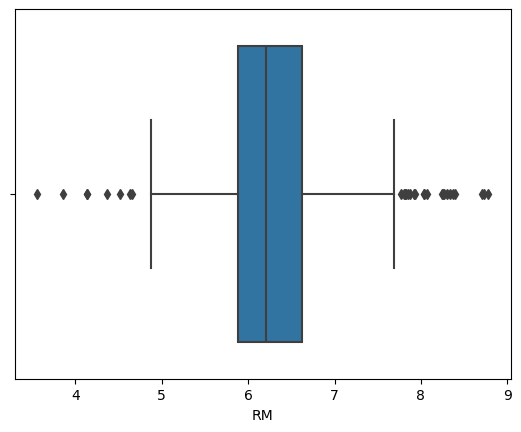

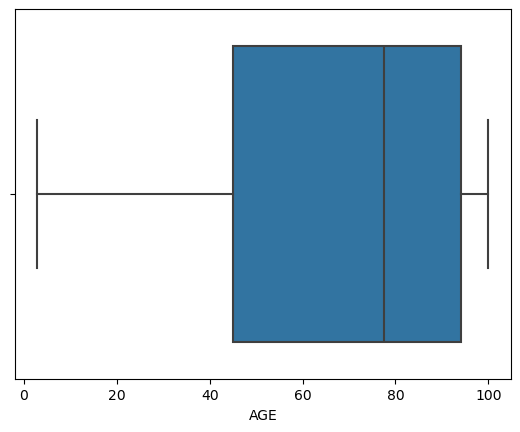

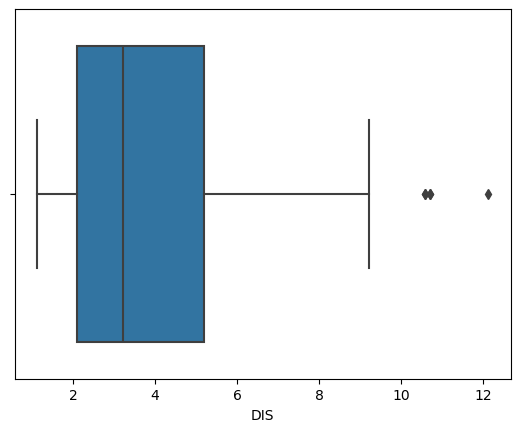

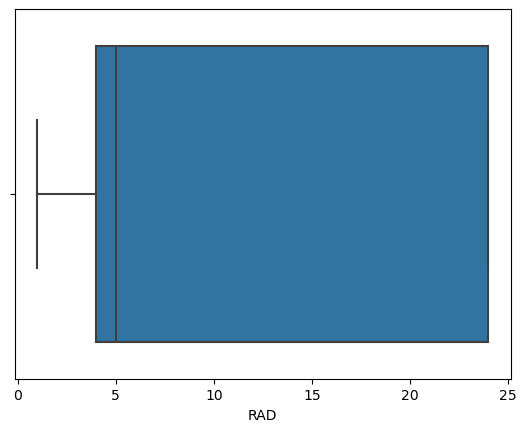

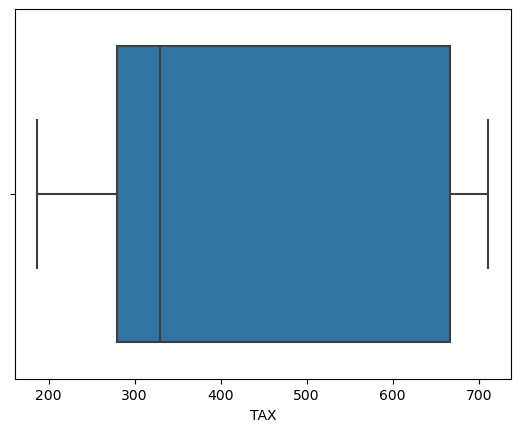

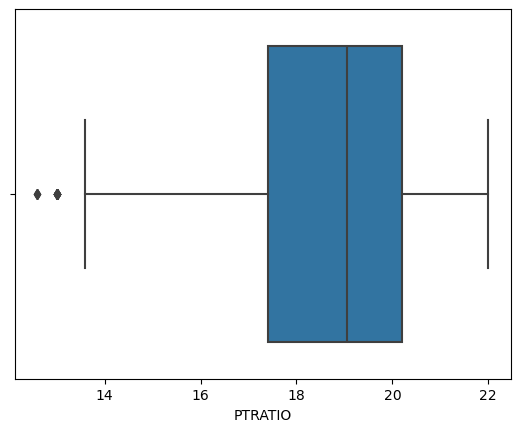

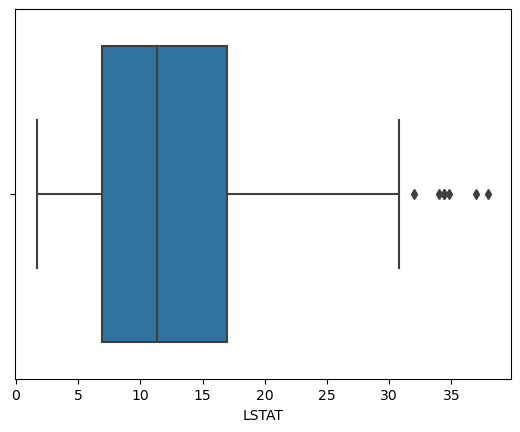

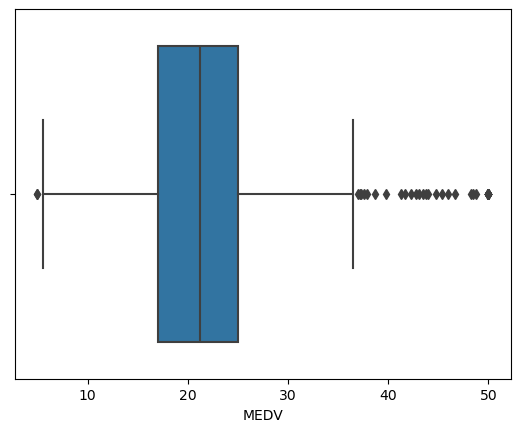

In [53]:
import warnings
warnings.filterwarnings("ignore")
for i in df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [54]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

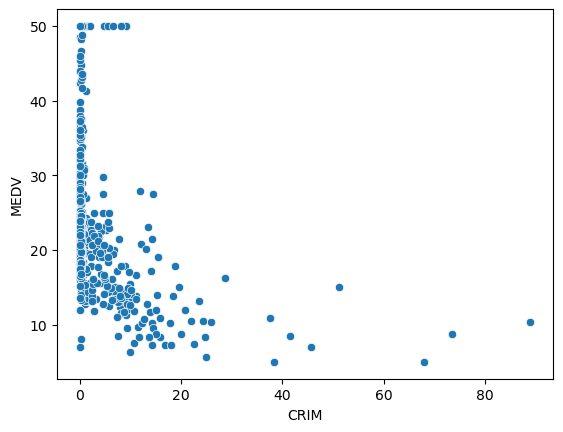

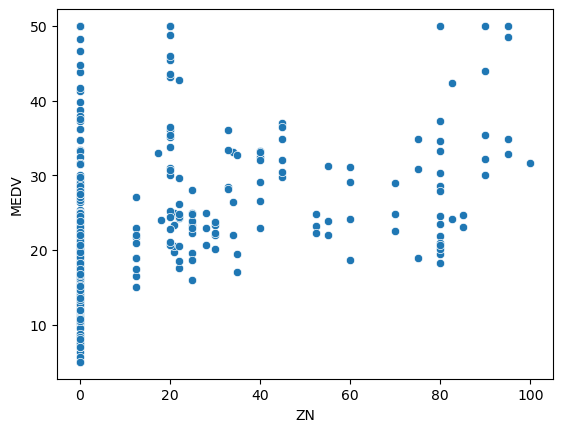

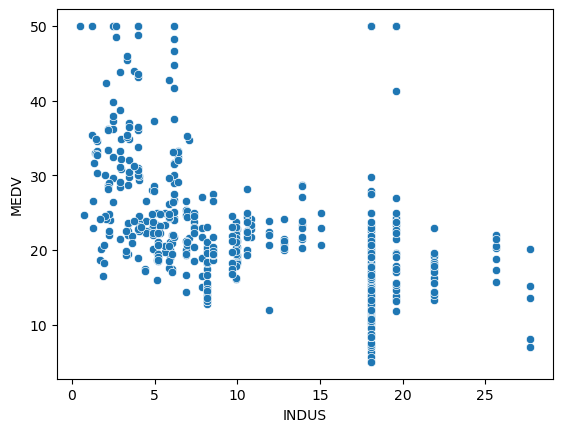

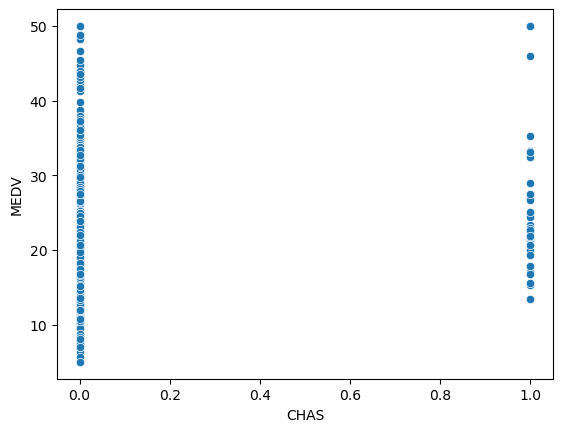

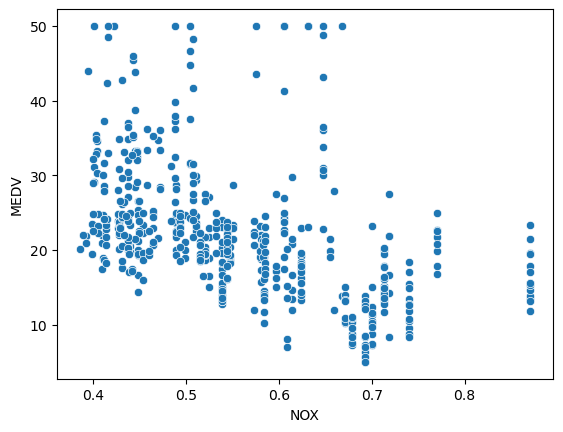

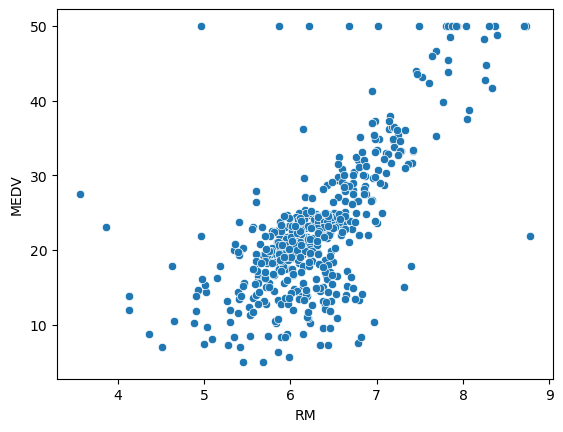

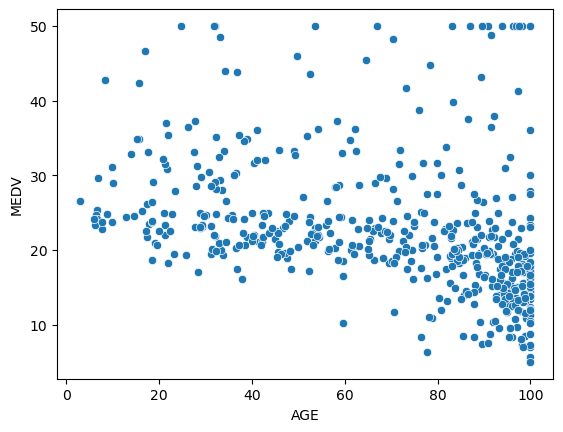

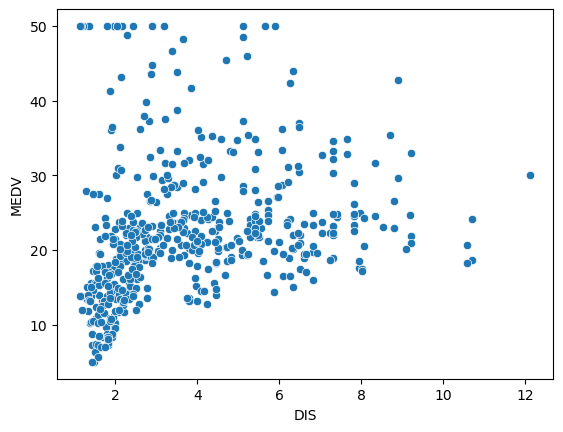

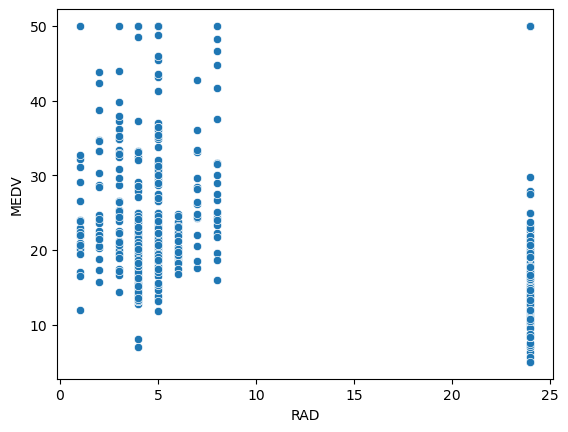

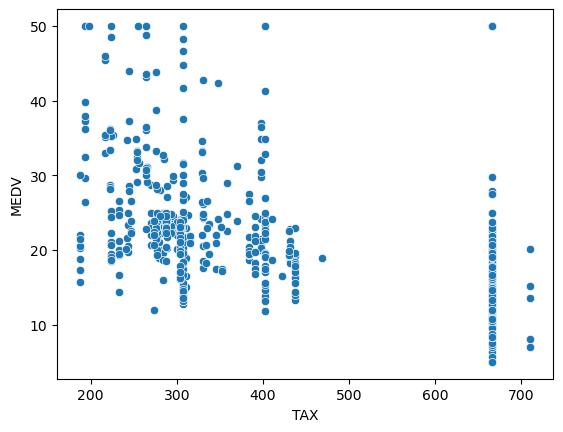

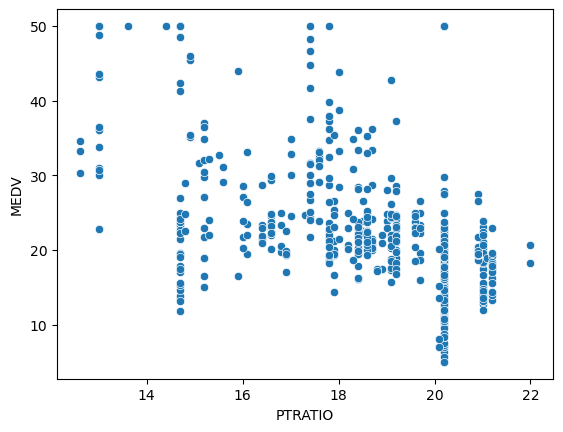

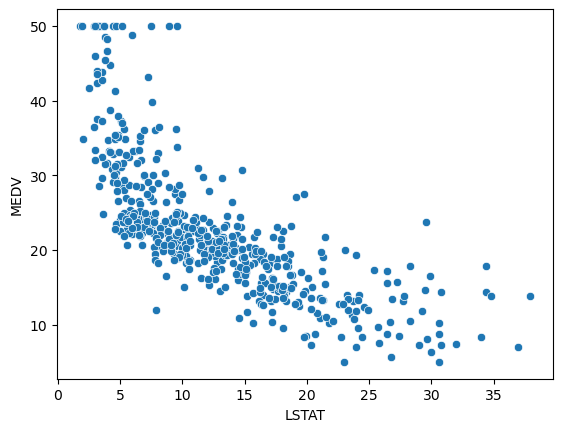

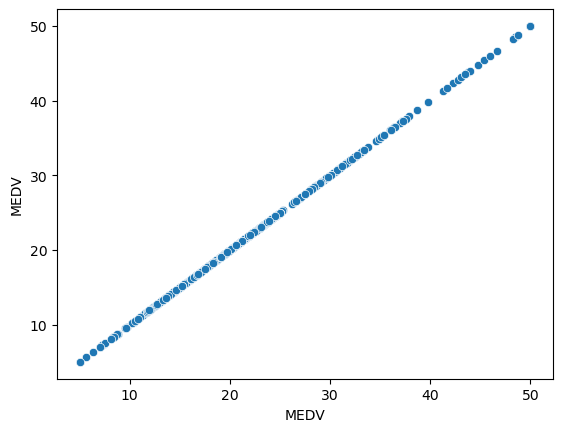

In [56]:
import warnings
warnings.filterwarnings("ignore")
for i in ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX',
    'PTRATIO','LSTAT','MEDV'] :
    sns.scatterplot(data=df,x=i, y = 'MEDV')
    plt.show()

In [86]:
def whisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3 - q1
    lw = q1 - 3*iqr
    uw = q3 - 3*iqr
    return lw,uw

In [87]:
for i in ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT']:
    lw,uw = whisker(df[i])
    df[i] = np.where(df[i]<lw,lw,df[i])
    df[i]= np.where(df[i]>uw,uw,df[i])


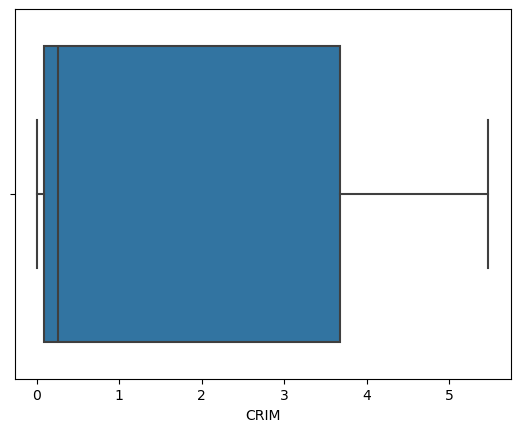

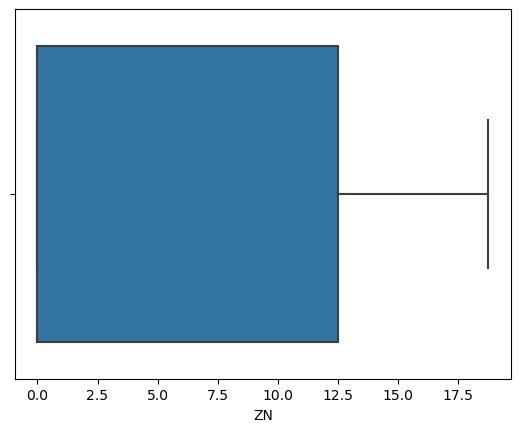

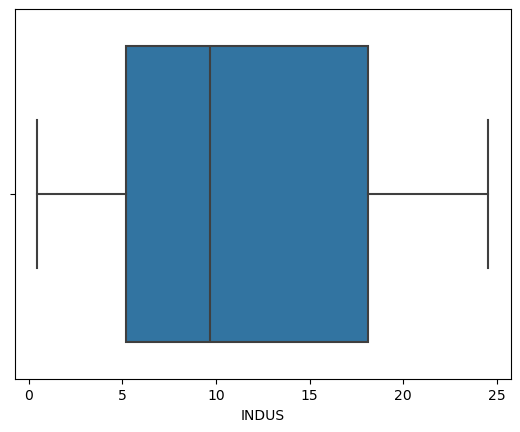

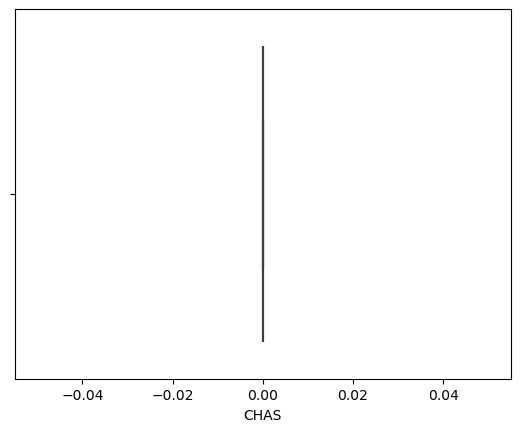

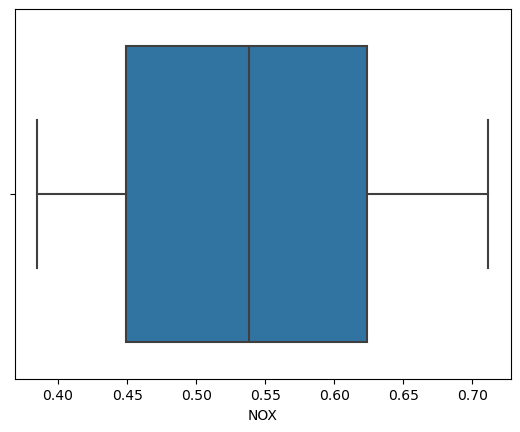

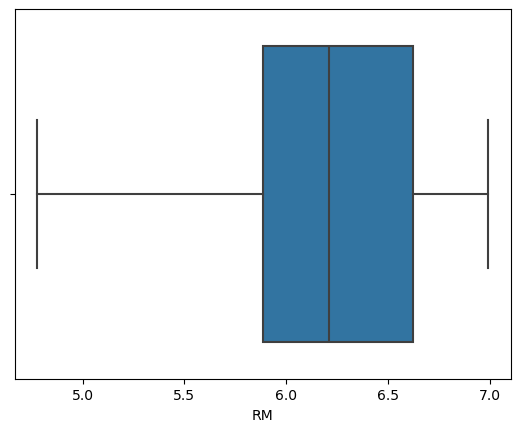

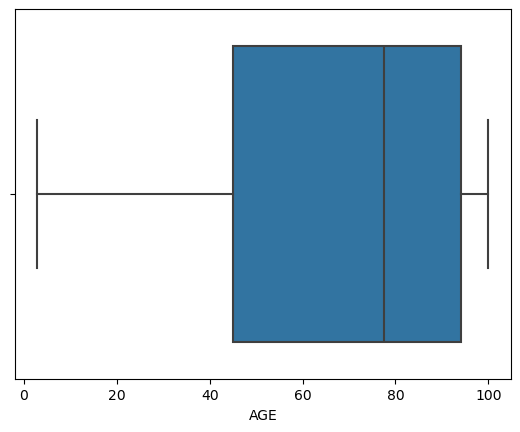

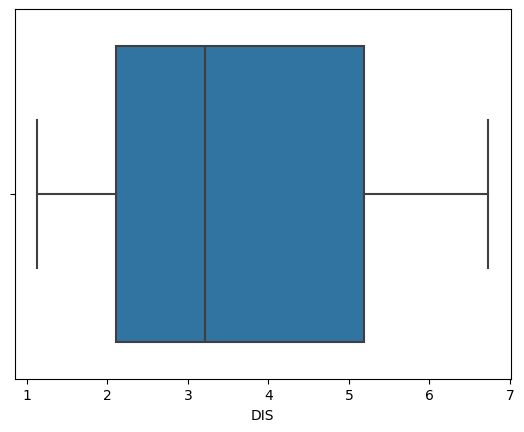

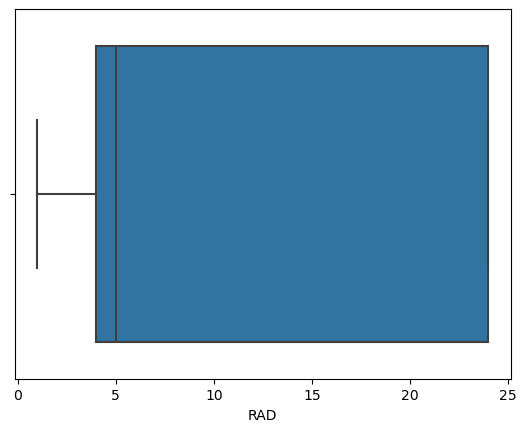

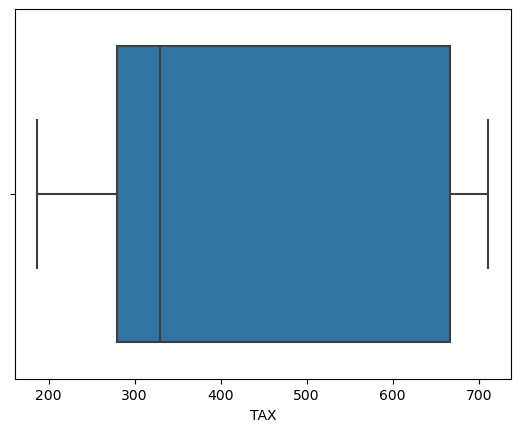

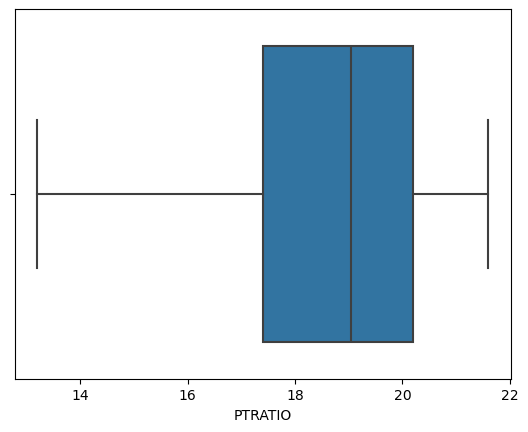

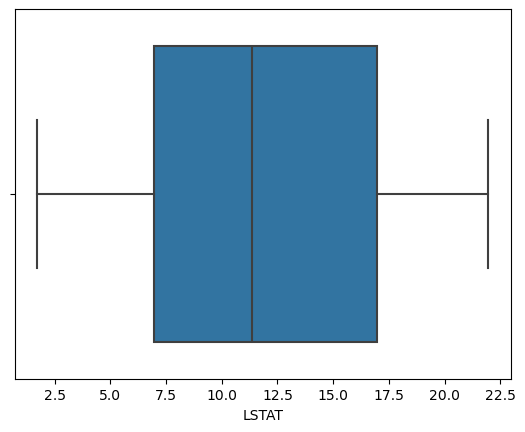

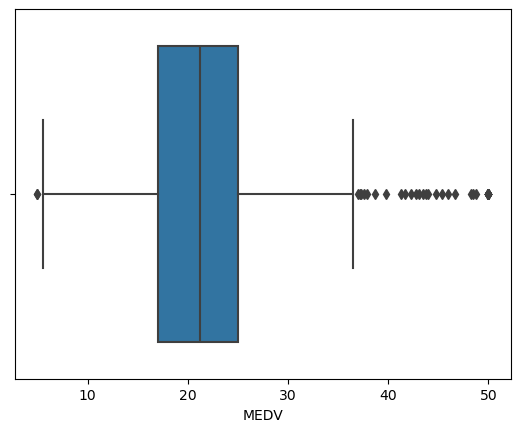

In [89]:
import warnings
warnings.filterwarnings("ignore")
for i in df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()


In [59]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

<Axes: xlabel='MEDV', ylabel='Density'>

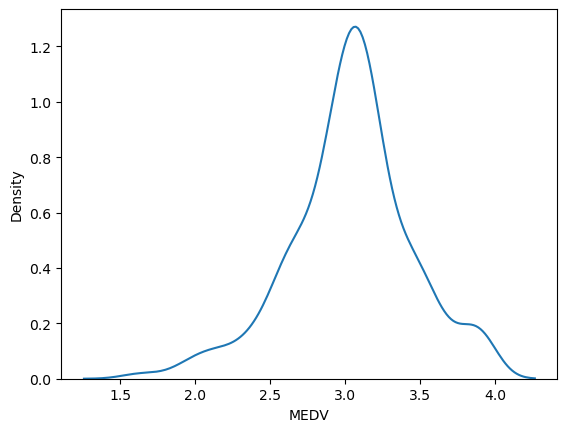

In [91]:
sns.kdeplot(x= np.log(df['MEDV']))          ##Transformation 

START BUILDING MODEL

In [94]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [95]:
from sklearn.model_selection import train_test_split 


create x,y 

In [98]:
x=df.drop('MEDV',axis=1)
y=df['MEDV']

In [104]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state = 42 )

In [105]:
model.fit(x_train,y_train)

LinearRegression()

In [106]:
y_predict = model.predict(x_test)
y_predict

array([30.45956962, 35.7664822 , 12.72369397, 26.67866803, 15.57692038,
       23.12383255, 14.25153171, 10.81923236, 22.56317622, 19.73447399,
       19.59959831, 15.49370412,  8.06275303, 20.56513636, 19.40001022,
       24.81636678, 18.80284689,  8.33555347, 37.25680865, 14.49073632,
       28.9702835 , 31.01560027,  6.83253032, 24.48436582, 17.22296245,
       14.4947249 , 23.69098291, 14.88888782, 17.08353286, 18.46113114,
       22.31054655, 26.25529636, 24.18536295, 21.57312116, 12.96737773,
       20.1751828 , 32.19438464, 20.21991977, 19.02416858, 24.98772622,
       10.13281308, 33.78325624, 38.588381  , 16.15886471, 28.25304459,
       15.07746573, 11.42317118, 26.37665807, 17.767932  , 32.92872363,
       20.19541806, 36.26747093, 11.82629968, 27.48415313, 40.79751907,
       22.19813198, 16.69783932, 33.50860332, 24.67499129, 11.43573083,
       23.4909875 , 30.93316985, 34.35597684, 17.10343877, 26.54659787,
       10.44648232, 17.69756903, 27.45167394, 31.15483931, 12.58

In [107]:
from sklearn.metrics import mean_squared_error ,r2_score

In [108]:
r2_score(y_test,y_predict)

0.710711772424466

In [109]:
coef = model.coef_
for i,j in zip(x_train.columns,coef):
    print(f"{i}={j}")

CRIM=-0.4174154082261413
ZN=0.07242771049749834
INDUS=0.0492305870979158
CHAS=7.560618797697316e-14
NOX=-19.365469455455685
RM=2.7693606062354186
AGE=0.013278530068901919
DIS=-1.8525273826129454
RAD=0.30912770455451255
TAX=-0.010116516884530413
PTRATIO=-0.9296391811292625
LSTAT=-1.0519179353834747


In [151]:
model.intercept_

52.58248575128902

In [111]:
v = np.sqrt(mean_squared_error(y_test,y_predict))


4.642818254895902

In [112]:
y_test.mean()

21.407894736842106

In [114]:
4.642818254895902/21.407894736842106

0.21687411639341642

In [116]:
residual = y_test - y_predict

In [117]:
residual.mean()

-0.0010670198673557365

1.2837794760044865

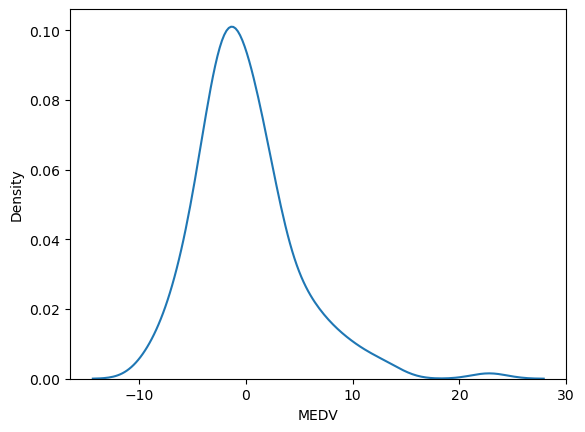

In [123]:
sns.kdeplot(x= residual)
residual.skew()

<Axes: xlabel='MEDV'>

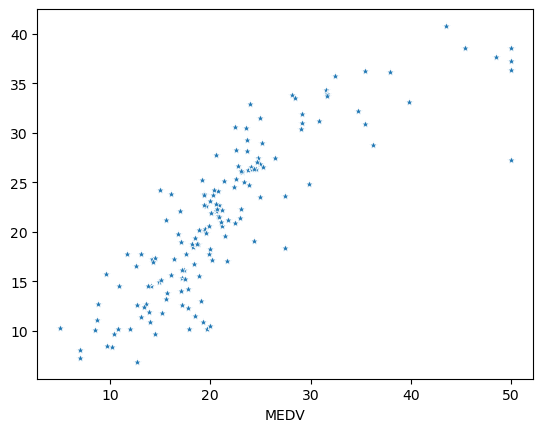

In [153]:
sns.scatterplot(x = y_test, y= y_predict ,marker="*")


<Axes: xlabel='MEDV', ylabel='MEDV'>

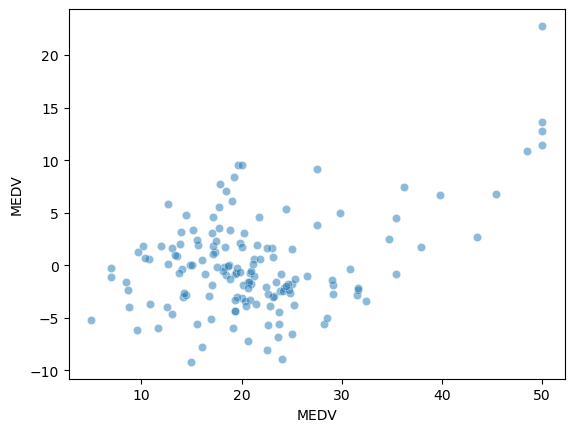

In [154]:
sns.scatterplot(x = y_test, y= residual,alpha =0.5 )

In [164]:
k=df.drop('CHAS',axis=1)
k.head()
k.corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.409429,0.690744,0.776894,-0.257951,0.545735,-0.617740,0.951841,0.901887,0.411211,0.578051,-0.430047
ZN,-0.409429,1.000000,-0.592432,-0.562240,0.365938,-0.551155,0.644444,-0.348293,-0.405251,-0.457864,-0.469560,0.384816
INDUS,0.690744,-0.592432,1.000000,0.798964,-0.409385,0.648501,-0.740255,0.608924,0.726062,0.385281,0.633738,-0.485244
NOX,0.776894,-0.562240,0.798964,1.000000,-0.330001,0.769645,-0.847245,0.693088,0.735413,0.290819,0.637884,-0.443585
RM,-0.257951,0.365938,-0.409385,-0.330001,1.000000,-0.284860,0.274307,-0.200652,-0.282469,-0.306906,-0.615247,0.615168
AGE,0.545735,-0.551155,0.648501,0.769645,-0.284860,1.000000,-0.775775,0.456022,0.506456,0.264916,0.638933,-0.376955
DIS,-0.617740,0.644444,-0.740255,-0.847245,0.274307,-0.775775,1.000000,-0.532015,-0.584680,-0.267657,-0.535524,0.272864
RAD,0.951841,-0.348293,0.608924,0.693088,-0.200652,0.456022,-0.532015,1.000000,0.910228,0.467707,0.504525,-0.381626
TAX,0.901887,-0.405251,0.726062,0.735413,-0.282469,0.506456,-0.584680,0.910228,1.000000,0.463552,0.564667,-0.468536
PTRATIO,0.411211,-0.457864,0.385281,0.290819,-0.306906,0.264916,-0.267657,0.467707,0.463552,1.000000,0.415701,-0.507520


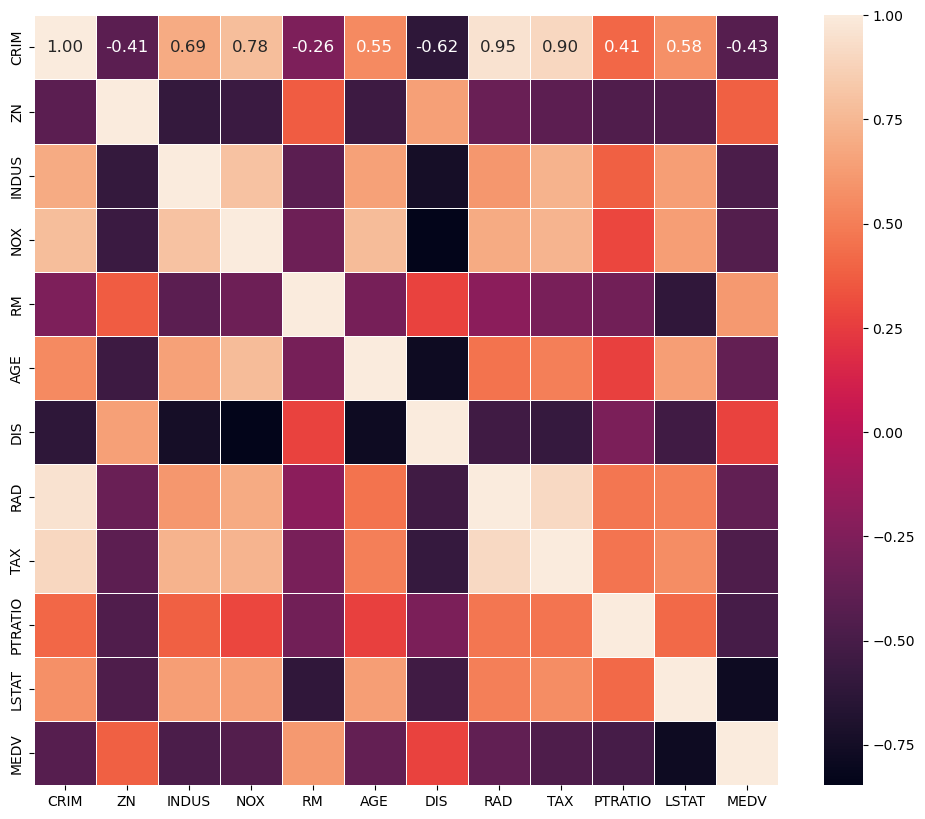

In [170]:
plt.figure(figsize=(12, 10))
sns.heatmap(k.corr(), annot=True,fmt=".2f",annot_kws={"size": 12},linewidth = 0.5)
plt.show()
